# University Performance Predictor 

Given a student's previous performance metrics, predict their performance at an anonymous University in Colombia.

## Prepare Data
Load and inspect two anonymized datasets:
- `icfes_combined_anonymized.csv`: standardized test scores (ICFES).
- `student_info_anonymized.csv`: student academic performance at the university.

For each student, we have their national test score for 'ICFES' (Colombian counterpart of the SAT), the high school they graduated (and their percentile in that highschool, being a relationship between their test score and their school historic performance on the test), their admission way to the University (high school grades / ICFES score / transfer from another University, etc), their undergraduate major, overall University GPA, overall hours taken, overall hours dropped, overall hours failed, and semesters coursed at the Colombian University. We have anonymized the student data and the school data for NDA purposes.

In [24]:
# usage: from icfes_loader import load_icfes_dataset, load_icfes_subset
# load_icfes_dataset(path)
# load_icfes_subset(n, path)

import pandas as pd
from pathlib import Path

# Explicit column data types (as before)
ICFES_DTYPES = {
    "SCHOOL_ID": "string",
    "PUNT_LECTURA_CRITICA": "float64",
    "PERCENTIL_LECTURA_CRITICA": "float64",
    "PUNT_MATEMATICAS": "float64",
    "PERCENTIL_MATEMATICAS": "float64",
    "PUNT_C_NATURALES": "float64",
    "PERCENTIL_C_NATURALES": "float64",
    "PUNT_SOCIALES_CIUDADANAS": "float64",
    "PERCENTIL_SOCIALES_CIUDADANAS": "float64",
    "PUNT_INGLES": "float64",
    "PERCENTIL_INGLES": "float64",
    "PUNT_GLOBAL": "float64",
    "PERCENTIL_GLOBAL": "float64",
    "semestre": "int64"
}

def load_icfes_dataset(path: str = "anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    """
    Load the full ICFES dataset with correct data types.
    Automatically handles non-numeric values gracefully.
    """
    path = Path(path)

    # Read once without dtype enforcement to avoid header casting errors
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Convert numeric columns safely
    for col, dtype in ICFES_DTYPES.items():
        if col not in df.columns:
            continue  # skip if column missing
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df


def load_icfes_subset(n: int, path: str = "anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    """
    Load a subset (first n rows) of the ICFES dataset with correct data types.

    Args:
        n (int): Number of rows to load.
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Subset of dataset.
    """
    path = Path(path)

    # Load CSV without dtype enforcement to avoid conversion errors
    df = pd.read_csv(path, sep=';', low_memory=False, nrows=n)

    # Convert each column safely according to DTYPES
    for col, dtype in ICFES_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df

# usage: from student_loader import load_student_dataset, load_student_subset
# load_student_dataset(path)
# load_student_subset(n, path)

# Define the expected data types for each column
STUD_DTYPES = {
    "STUDENT_ID": "string",
    "ADMISSION_TYPE": "string",
    "STUDY_PROGRAM": "string",
    "TEST_SCORE_NEEDED_MAJOR": "float64",
    "ENTRY_TERM": "int64",
    "TEST_SCORE": "float64",
    "TERM_CODE": "int64",
    "TERM_GPA": "float64",
    "OVERALL_GPA": "float64",
    "HOURS_TAKEN": "float64",
    "HOURS_FINISHED": "float64",
    "HOURS_PASSED": "float64",
    "HOURS_FAILED": "float64",
    "HOURS_DROPPED": "float64",
    "SCHOOL_ID": "string",
}

def load_student_dataset(path: str = "anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load the full student performance dataset with correct data types.

    Args:
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: The dataset with proper column types.
    """
    path = Path(path)

    # Load CSV without dtype enforcement to avoid conversion errors
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Convert each column safely according to DTYPES
    for col, dtype in STUD_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df


def load_student_subset(n: int, path: str = "anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load a subset (first n rows) of the student dataset with correct data types.

    Args:
        n (int): Number of rows to load.
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Subset of dataset.
    """
    path = Path(path)

    # Load CSV without dtype enforcement to avoid conversion errors
    df = pd.read_csv(path, sep=';', low_memory=False, nrows=n)

    # Convert each column safely according to DTYPES
    for col, dtype in STUD_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df

If running locally, make sure the `anonymized/` folder is located at the project root (same directory as this notebook) and must contain:
- `icfes_combined_anonymized.csv`
- `student_info_anonymized.csv`

If using Google Colab, make sure the `anonymized/` folder is located under `content` folder and must contain:
- `icfes_combined_anonymized.csv`
- `student_info_anonymized.csv`

In [25]:
# Load the full ICFES dataset and inspect the rows
icfes_path = "anonymized/icfes_combined_anonymized.csv" # @param {type:"string"}
icfes_df = load_icfes_dataset(icfes_path) # input path to csv file
icfes_df

,SCHOOL_ID,SCHOOL_NAME,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,semestre
0,school_id_0,school_name_0,67.0,78.0,81.0,97.0,76.0,95.0,76.0,94.0,80.0,80.0,377.0,94.0,20171
1,school_id_1,school_name_1,54.0,38.0,50.0,36.0,53.0,38.0,39.0,10.0,52.0,38.0,246.0,30.0,20171
2,school_id_2,school_name_2,59.0,53.0,60.0,58.0,56.0,47.0,61.0,61.0,50.0,35.0,292.0,53.0,20171
3,school_id_3,school_name_3,54.0,38.0,60.0,60.0,59.0,54.0,53.0,40.0,79.0,79.0,291.0,52.0,20171
4,school_id_4,school_name_4,63.0,67.0,63.0,67.0,61.0,59.0,59.0,57.0,78.0,76.0,314.0,64.0,20171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704617,school_id_1125,school_name_1167,44.0,20.0,38.0,15.0,38.0,13.0,47.0,47.0,38.0,13.0,207.0,20.0,20232
1704618,school_id_1125,school_name_1167,54.0,54.0,48.0,38.0,56.0,71.0,48.0,51.0,56.0,70.0,259.0,55.0,20232
1704619,school_id_7940,school_name_7590,57.0,62.0,61.0,78.0,54.0,66.0,60.0,81.0,52.0,58.0,288.0,73.0,20232
1704620,school_id_7940,school_name_7590,70.0,95.0,73.0,96.0,74.0,100.0,70.0,97.0,64.0,85.0,356.0,98.0,20232


In [26]:
# load student dataset
student_path = "anonymized/student_info_anonymized.csv" # @param {type:"string"}
student_df = load_student_dataset(student_path)
student_df

,ADMISSION_TYPE,STUDY_PROGRAM,TEST_SCORE_NEEDED_MAJOR,ENTRY_TERM,TEST_SCORE,TERM_CODE,TERM_GPA,OVERALL_GPA,HOURS_TAKEN,HOURS_FINISHED,HOURS_PASSED,HOURS_FAILED,HOURS_DROPPED,SCHOOL_ID,SCHOOL_NAME
0,entry_way_0,study_major_0,310,202020,354,202020,3.641765,2.817846,20,17,17,0,3,school_id_10971,school_name_10418
1,entry_way_0,study_major_0,310,202020,354,202110,0.000000,2.817846,23,8,2,6,15,school_id_10971,school_name_10418
2,entry_way_0,study_major_0,310,202020,354,202110,0.000000,2.817846,23,8,2,6,15,school_id_10971,school_name_10418
3,entry_way_0,study_major_0,310,202020,354,202120,0.000000,2.817846,19,6,3,3,13,school_id_10971,school_name_10418
4,entry_way_0,study_major_0,310,202020,354,202120,2.975000,2.817846,19,6,3,3,13,school_id_10971,school_name_10418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163256,entry_way_0,study_major_45,300,202510,345,202510,3.828333,3.828333,12,12,12,0,0,school_id_561,school_name_580
163257,entry_way_0,study_major_44,300,202510,332,202510,4.148000,4.148000,16,16,16,0,0,school_id_2475,school_name_2460
163258,entry_way_0,study_major_15,300,202510,373,202510,4.623750,4.623750,18,18,18,0,0,school_id_625,school_name_12238
163259,entry_way_0,study_major_19,300,202510,370,202510,4.083750,4.083750,17,17,17,0,0,school_id_8396,school_name_8033


In [27]:
import numpy as np
from matplotlib import pyplot as plt


### PRE-CLEANING VISUALIZATION

Saved: icfes_school_averages.csv
Saved: student_school_averages.csv
Merged shape: (2175, 29)
         SCHOOL_ID  PUNT_GLOBAL  OVERALL_GPA
0      school_id_0   338.655367     4.106260
1      school_id_1   301.422330     3.980827
2    school_id_100   347.104255     4.227010
3  school_id_10002   298.118812     4.161688
4  school_id_10004   300.284615     3.988316


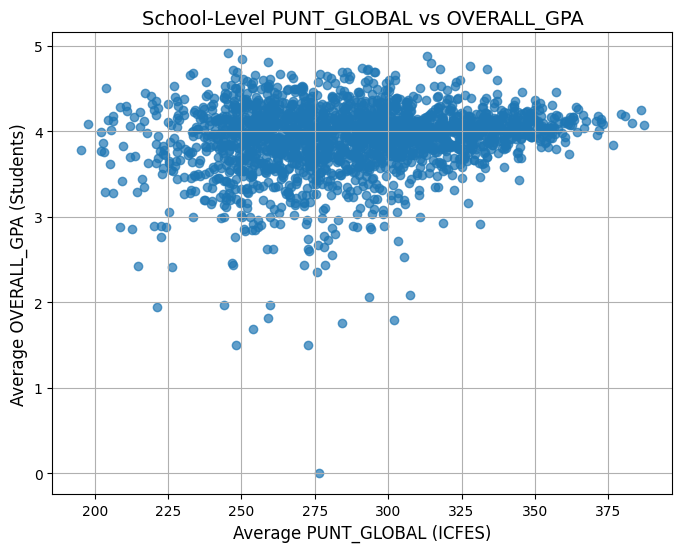

In [28]:
# PRE-CLEANING VISUALIZATION - SANGWOO

# icfes: GROUP BY SCHOOL_ID
def load_icfes_dataset(path="anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Convert ALL columns except SCHOOL_ID to numeric where possible
    for col in df.columns:
        if col != "SCHOOL_ID":
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Convert SCHOOL_ID to string consistently
    df["SCHOOL_ID"] = df["SCHOOL_ID"].astype("string")

    return df

def aggregate_icfes_by_school(df: pd.DataFrame) -> pd.DataFrame:
    numeric_columns = df.select_dtypes(include=['number']).columns

    school_avg = (
        df.groupby("SCHOOL_ID")[numeric_columns]
          .mean()
          .reset_index()
    )

    return school_avg
df = load_icfes_dataset()
df.dtypes


df = load_icfes_dataset()
school_avg = aggregate_icfes_by_school(df)
school_avg.head()

# Export to CSV
output_path = "icfes_school_averages.csv"
school_avg.to_csv(output_path, index=False)

print("Saved:", output_path)


# student: GROUP BY STUDENT_ID
def load_student_dataset(path="anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load the full student dataset and safely convert numeric columns.
    SCHOOL_ID is in column 15 of the CSV file.
    """
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Convert SCHOOL_ID to string
    df["SCHOOL_ID"] = df["SCHOOL_ID"].astype("string")

    # Convert all other columns to numeric where possible
    for col in df.columns:
        if col != "SCHOOL_ID":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    return df

def aggregate_student_by_school(df: pd.DataFrame) -> pd.DataFrame:
    """
    Average all numeric columns per SCHOOL_ID.
    Output has:
      - One row per SCHOOL_ID
      - One averaged value per numeric column
    """
    # Select numeric columns (skip SCHOOL_ID automatically)
    numeric_cols = df.select_dtypes(include=["number"]).columns

    school_avg = (
        df.groupby("SCHOOL_ID")[numeric_cols]
          .mean()
          .reset_index()
    )

    return school_avg


# Load student dataset
df_students = load_student_dataset("anonymized/student_info_anonymized.csv")

# Aggregate by SCHOOL_ID
student_school_avg = aggregate_student_by_school(df_students)

# Preview table
student_school_avg.head()

# Export to CSV
output_path = "student_school_averages.csv"
student_school_avg.to_csv(output_path, index=False)

print("Saved:", output_path)

# Scatterplots / Box plots

# For each SCHOOL_ID
#  Plot PUNT_GLOBAL vs. OVERALL_GPA
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load averaged CSV files
# --------------------------
icfes = pd.read_csv("icfes_school_averages.csv")
students = pd.read_csv("student_school_averages.csv")

# Convert SCHOOL_ID to string to ensure clean merge
icfes["SCHOOL_ID"] = icfes["SCHOOL_ID"].astype(str)
students["SCHOOL_ID"] = students["SCHOOL_ID"].astype(str)

# --------------------------
# Merge by SCHOOL_ID
# --------------------------
merged = pd.merge(icfes, students, on="SCHOOL_ID", how="inner")

print("Merged shape:", merged.shape)
print(merged[["SCHOOL_ID", "PUNT_GLOBAL", "OVERALL_GPA"]].head())

# --------------------------
# Scatter Plot
# --------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    merged["PUNT_GLOBAL"],
    merged["OVERALL_GPA"],
    alpha=0.7
)

plt.xlabel("Average PUNT_GLOBAL (ICFES)", fontsize=12)
plt.ylabel("Average OVERALL_GPA (Students)", fontsize=12)
plt.title("School-Level PUNT_GLOBAL vs OVERALL_GPA", fontsize=14)

plt.grid(True)
plt.show()


### PRE-CLEANING STATISTICS

In [ ]:
# PRE-CLEANING STATISTICS - RICHARD
pd.set_option("display.max_columns", None) # show all columns

print("PRE-CLEANING STATISTICS")

# 1. ICFES STATISTICS (mean, median, std, min, max) BY SCHOOL
# This includes all the numerical data from raw ICFES which helps us in determining how to clean the data
print("ICFES SCORE STATISTICS BY SCHOOL_ID\n")
# takes the raw ICFES dataset icfes_df, picks only numeric columns (test scores, percentiles, semester, etc.)
numeric_icfes = icfes_df.select_dtypes(include="number").columns

icfes_stats_by_school = (
    icfes_df.groupby("SCHOOL_ID")[numeric_icfes] # Groups all ICFES records by the school they belong to, limit the aggregation to numeric columns only
            .agg(["mean", "median", "std", "min", "max"]) # for each school and each numeric column, compute the statistics
)
display(icfes_stats_by_school) # a table indexed by SCHOOL_ID, containing statistics of each feature (Percentile, scores, etc)


# 2. STUDENT UNIVERSITY PERFORMANCE STATISTICS BY SCHOOL
# This inlcudes all the numerical data from raw student dataset, looking at the TERM_GPA, OVERALL_GPA for each school can be helpful
print("\nSTUDENT PERFORMANCE STATISTICS BY SCHOOL_ID\n")
# takes the raw student dataset student_df, picks only numeric columns
numeric_student = student_df.select_dtypes(include="number").columns 

stud_stats_by_school = (
    student_df.groupby("SCHOOL_ID")[numeric_student] # group by school, 
              .agg(["mean", "median", "std", "min", "max"])
)
display(stud_stats_by_school) # a table indexed by SCHOOL_ID, containing statistics of each feature


# 3. STUDENT PERFORMANCE STATISTICS BY MAJOR
# This uses only the student dataset which contains the STUDY_PROGRAM column (study major)
print("\nUNIVERSITY GPA STATISTICS BY STUDY_PROGRAM (Major). Sorted in Descending Mean OVERALL_GPA\n")

if "STUDY_PROGRAM" in student_df.columns: # check that the column STUDY_PROGRAM exists
    gpa_stats_by_major = (
        student_df.groupby("STUDY_PROGRAM")["OVERALL_GPA"] # group students by STUDY_PROGRAM (major) and focus on OVERALL_GPA column
                  .agg(["mean", "median", "std", "min", "max"])
                  .sort_values("mean", ascending=False) # sorted in descending mean OVERALL_GPA
    )
    display(gpa_stats_by_major)
else:
    print("STUDY_PROGRAM column not found.")


# 4. OVERALL NUMERICAL STATISTICS
# This uses the numerical data from both icfes datasetand student dataset 
print("Number of unique SCHOOL_ID in ICFES dataset:", icfes_df["SCHOOL_ID"].nunique())
print("Number of unique SCHOOL_ID in Student dataset:", student_df["SCHOOL_ID"].nunique())

icfes_ids = set(icfes_df["SCHOOL_ID"].unique())
student_ids = set(student_df["SCHOOL_ID"].unique())

print("\nSCHOOL_IDs present only in ICFES dataset:", len(icfes_ids - student_ids))
print("SCHOOL_IDs present only in Student dataset:", len(student_ids - icfes_ids))
print("SCHOOL_IDs present in BOTH:", len(icfes_ids & student_ids)) # 2175
# so after merging, there are 2175 unique SCHOOL_IDs


print("\nCOMBINED (ICFES + Student) STATISTICS BY SCHOOL_ID\n")
# Merge the two aggregated tables on SCHOOL_ID. SCHOOL_ID (and SCHOOL_NAME) is the only shared atttribue, other columns are all unique
combined_stats_by_school = icfes_stats_by_school.join(
    stud_stats_by_school,
    how="inner",
)
display(combined_stats_by_school)


PRE-CLEANING STATISTICS
ICFES SCORE STATISTICS BY SCHOOL_ID



PUNT_LECTURA_CRITICA                                PERCENTIL_LECTURA_CRITICA                               PUNT_MATEMATICAS                                PERCENTIL_MATEMATICAS                               PUNT_C_NATURALES                                PERCENTIL_C_NATURALES                                PUNT_SOCIALES_CIUDADANAS                                PERCENTIL_SOCIALES_CIUDADANAS                                PUNT_INGLES                                PERCENTIL_INGLES                                PUNT_GLOBAL                                 PERCENTIL_GLOBAL                                     semestre                                  
                               mean median        std   min    max                      mean median        std  min    max             mean median        std   min    max                  mean median        std  min    max             mean median        std   min    max                  mean median        std   min    max                     mean median        std   min    max                          mean median        std   min    max        mean median        std   min    max             mean median        std   min    max        mean median        std    min    max             mean median        std   min    max          mean   median        std    min    max
SCHOOL_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
school_id_0               67.983051   68.0   7.642937  39.0  100.0                 72.627119   77.0  20.616546  8.0  100.0        67.327684   68.0   8.054853  32.0  100.0             70.406780   73.0  18.719325  5.0  100.0        65.502825   66.0   7.749725  40.0   83.0             72.920904   77.0  19.823209  14.0  100.0                65.751412   67.0   8.675024  38.0   82.0                     72.265537   78.0  20.737335  15.0  100.0   80.847458   80.0   6.856848  62.0  100.0        77.819209   80.0  13.481093  37.0  100.0  338.655367  342.0  33.140710  209.0  404.0        73.994350   77.0  18.009309  16.0   99.0  20209.248588  20211.0  19.649928  20171  20231
school_id_1               61.635922   62.0   7.935009  33.0   80.0                 56.694175   55.0  22.238588  2.0  100.0        61.160194   61.0   9.780946  30.0  100.0             57.592233   57.0  21.542216  4.0  100.0        58.699029   60.0   8.758923  31.0   79.0             56.072816   57.0  21.189034   2.0   99.0                58.325243   59.0  10.955166  31.0  100.0                     55.631068   56.0  23.695421   3.0  100.0   64.320388   64.5  10.833294  32.0  100.0        52.587379   54.0  17.511241   5.0  100.0  301.422330  304.5  41.120540  173.0  406.0        56.174757   57.0  20.427589   3.0   99.0  20197.116505  20191.0  20.540644  20171  20231
school_id_10              61.448000   62.0   8.862589  33.0   83.0                 55.352000   54.0  24.763867  2.0  100.0        60.852000   60.0  11.602438  25.0  100.0             56.224000   55.5  25.648180  1.0  100.0        60.040000   60.0   9.108802  38.0   83.0             58.808000   59.5  23.459166   6.0  100.0                56.860000   58.0  11.513585  25.0  100.0                     52.124000   53.0  25.656141   1.0  100.0   58.200000   56.0  11.734684  26.0   87.0        41.564000   39.5  19.596889   4.0   95.0  298.404000  299.0  45.416422  187.0  414.0        54.068000   54.0  23.344792   4.0  100.0  20203.080000  20211.0  21.7616


STUDENT PERFORMANCE STATISTICS BY SCHOOL_ID



TEST_SCORE_NEEDED_MAJOR                                 ENTRY_TERM                                        TEST_SCORE                                  TERM_CODE                                        TERM_GPA                                         OVERALL_GPA                                         HOURS_TAKEN                          HOURS_FINISHED                          HOURS_PASSED                          HOURS_FAILED                          HOURS_DROPPED                         
                                   mean median        std  min  max           mean    median         std     min     max        mean median        std  min  max           mean    median         std     min     max      mean    median       std       min       max        mean    median       std       min       max        mean median       std min max           mean median       std min max         mean median       std min max         mean median       std min max          mean median       std min max
SCHOOL_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
school_id_0                  320.593023  310.0  22.521841  300  370  202029.680233  202020.0  204.970771  201720  202510  360.398256  362.0  28.663242  289  410  202226.590116  202220.0  195.464575  201810  202519  3.828108  4.104477  1.151806  0.000000  5.000000    4.106260  4.088455  0.371503  2.229412  4.770154   16.531977   18.0  5.162561   0  27      15.383721   17.0  5.404714   0  27    14.875000   17.0  5.643341   0  27     0.508721    0.0  1.658949   0  11      1.148256    0.0  2.330830   0  16
school_id_1                  335.000000  335.0   0.000000  335  335  201720.000000  201720.0    0.000000  201720  201720  376.000000  376.0   0.000000  376  376  202023.545455  202019.0  156.353039  201810  202310  3.695992  4.071875  1.293160  0.000000  5.000000    3.980827  3.980827  0.000000  3.980827  3.980827   14.090909   16.0  6.040771   3  21      13.090909   16.0  5.243177   3  18    12.363636   15.0  5.045250   3  16     0.727273    0.0  1.848833   0   6      1.000000    0.0  1.414214   0   3
school_id_100                318.268757  310.0  17.509261  300  396  202003.885778  202020.0  191.716458  201720  202510  357.046473  357.0  33.045297  248  499  202221.535834  202220.0  194.459464  201810  202519  3.761306  4.209365  1.390046  0.000000  5.000000    4.227010  4.258390  0.318076  2.130000  4.815119   16.916013   18.0  5.300145   0  29      15.788354   17.0  5.442132   0  29    15.388578   17.0  5.620108   0  29     0.399776    0.0  1.358975   0  13      1.127660    0.0  2.459179   0  20
school_id_10002              300.000000  300.0   0.000000  300  300  202310.000000  202310.0    0.000000  202310  202310  332.000000  332.0   0.000000  332  332  202394.000000  202410.0   82.036577  202310  202510  4.163124  4.180714  0.125339  3.958750  4.296000    4.161688  4.161688  0.000000  4.161688  4.161688   17.400000   17.0  1.140175  16  19      17.400000   17.0  1.140175  16  19    16.800000   17.0  2.280351  13  19     0.600000    0.0  1.341641   0   3      0.000000    0.0  0.000000   0   0
school_id_10004              329.870968  310.0  31.052366  300  368  201987.741935  202020.0  161.837566  201810  202210  361.387097  368.0  12.457066  345  372  202212.064516  202220.0  171.119439  201820  202519  3.796121  4.161053  1.287148  0.000000  5.000000    3.988316  4.210862  0.585895  3.026122  4.445315   17.129032   19.0  7.978061   2  30      15.451613   16.0  8.024291   2  28    14.709677   16.0  8.564242   0  28     0.741935    0.0  1.982721


UNIVERSITY GPA STATISTICS BY STUDY_PROGRAM (Major). Sorted in Descending Mean OVERALL_GPA



,mean,median,std,min,max
STUDY_PROGRAM,,,,,
study_major_35,4.390789,4.470435,0.344498,1.821875,4.882000
study_major_41,4.324294,4.361842,0.360379,1.912500,4.823000
study_major_18,4.317936,4.361111,0.282796,2.196364,4.910843
study_major_28,4.297135,4.346261,0.329118,1.885000,4.833289
study_major_11,4.263650,4.326615,0.388750,1.920000,4.896250
study_major_43,4.254811,4.420521,0.455368,2.403571,4.736121
study_major_16,4.254655,4.292577,0.317505,1.500000,4.865234
study_major_15,4.246685,4.326538,0.361006,1.500000,4.822478
study_major_40,4.232662,4.392875,0.497693,2.208667,4.680714


Number of unique SCHOOL_ID in ICFES dataset: 12464
Number of unique SCHOOL_ID in Student dataset: 2258

SCHOOL_IDs present only in ICFES: 10289
SCHOOL_IDs present only in Student: 83
SCHOOL_IDs present in BOTH: 2175

COMBINED (ICFES + Student) STATISTICS BY SCHOOL_ID



PUNT_LECTURA_CRITICA                                PERCENTIL_LECTURA_CRITICA                                PUNT_MATEMATICAS                                PERCENTIL_MATEMATICAS                               PUNT_C_NATURALES                                PERCENTIL_C_NATURALES                                PUNT_SOCIALES_CIUDADANAS                                PERCENTIL_SOCIALES_CIUDADANAS                                PUNT_INGLES                                PERCENTIL_INGLES                                PUNT_GLOBAL                                 PERCENTIL_GLOBAL                                     semestre                                   TEST_SCORE_NEEDED_MAJOR                                 ENTRY_TERM                                        TEST_SCORE                                  TERM_CODE                                        TERM_GPA                                         OVERALL_GPA                                         HOURS_TAKEN                          HOURS_FINISHED                          HOURS_PASSED                          HOURS_FAILED                          HOURS_DROPPED                         
                                mean median        std   min    max                      mean median        std   min    max             mean median        std   min    max                  mean median        std  min    max             mean median        std   min    max                  mean median        std   min    max                     mean median        std   min    max                          mean median        std   min    max        mean median        std   min    max             mean median        std   min    max        mean median        std    min    max             mean median        std   min    max          mean   median        std    min    max                    mean median        std  min  max           mean    median         std     min     max        mean median        std  min  max           mean    median         std     min     max      mean    median       std       min       max        mean    median       std       min       max        mean median       std min max           mean median       std min max         mean median       std min max         mean median       std min max          mean median       std min max
SCHOOL_ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
school_id_0                67.983051   68.0   7.642937  39.0  100.0                 72.627119   77.0  20.616546   8.0  100.0        67.327684   68.0   8.054853  32.0  100.0             70.406780   73.0  18.719325  5.0  100.0        65.502825   66.0   7.749725  40.0   83.0             72.920904   77.0  19.823209  14.0  100.0                65.751412   67.0   8.675024  38.0   82.0                     72.265537   78.0  20.737335  15.0  100.0   80.847458   80.0   6.856848  62.0  100.0        77.819209   80.0  13.4810

### Data Cleaning/Preprocess

In [30]:
# DATA CLEANING - JET

# Replacing null/zero values
# Getting rid of invalid entries

### MODELS

In [31]:
# MODELS - NICOLAS

# Model initialization
# Parameters/reasoning

## Split Data into Train, Validation, Test Dataset if needed

In [32]:
# TODO: Split Data into Train, Validation, Test Dataset if needed
# Since we have a large dataset, we can use a train/test/validation split. 
# We will experiment with different proportion of train/validation/test split

## Machine Learning Approaches/Models

### Model 1: Linear Regression Model for Classification/Regression?

In [33]:
from sklearn.linear_model import LinearRegression

### Model 2: Regularization Methods

In [34]:
# Regularization methods
from sklearn.linear_model import Ridge # Ridge Regression: a regularization technique used to reduce model complexity and prevent overfitting, especially when there is multicollinearity (high correlation between independent variables)
from sklearn.linear_model import Lasso # Lasso Regression: another regularization method that performs feature selection by shrinking the coefficients of less important features to exactly zero

### Model 3: Tree-based Methods for Classification/Regression: Decision Tree, Random Forest, Boosted Decision Trees

Classification Task:
- Visualize how the tree recursively partitions the data based on features and their respective split points. Each node represents a decision or a leaf. Internal nodes contain a splitting condition based on a feature and a threshold  e.g. using sklearn's `plot_tree`
- For classification, we could discretize GPA into categories (>3.5, 3.5 to 3.0, 3.0 to 2.5, etc.) and predict these labels. 

Regression Task:
- For regression, we directly predict the numeric GPA value.
- E.g. Regressor on GPA vs previous score.

In [35]:
# Tree-based regression models for capturing non-linear relationships:
from sklearn import tree
# Decision Tree Regression: Uses a tree-like structure to make decisions and splits the data into subsets to predict a continuous output.
from sklearn.tree import DecisionTreeRegressor 
# Random Forest Regression: An ensemble method that builds multiple decision trees and combines their results to improve accuracy and reduce overfitting compared to a single decision tree
from sklearn.ensemble import RandomForestRegressor # sklearn.ensemble.RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor